In [1]:
import pandas as pd

# Load the CSV files into pandas DataFrames
df1 = pd.read_csv('projecttimesheet.csv')
df2 = pd.read_csv('feedbackss.csv')

# Perform inner join on the 'feedbackId' column
merged_df = pd.merge(df1, df2, on='feedbackId', how='inner')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('jmantobedropped.csv', index=False)


# IMPORT LIBRAIRIES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import nltk
from ydata_profiling import ProfileReport


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# LOAD DATA

In [6]:
data = pd.read_csv('jmantobedropped.csv')


# UNDERSTAND THE DATA

In [7]:
print(data.head())

                      _id_x  userId_x               projectType_x projectId_x  \
0  66166cc7d31405dcf870afd3         1  Full Stack Web Development      FULL01   
1  66166cc7d31405dcf870afd7         1            Data Engineering      DATA01   
2  6618e3f4e7506de234ed1b8c        83  Full Stack Web Development      FULL01   
3  6618e3f4e7506de234ed1b8d        83  Full Stack Web Development      FULL01   
4  6618e3f4e7506de234ed1b8e        83  Full Stack Web Development      FULL01   

                                       projectName_x  \
0                      Railway Ticket Booking System   
1  DataNexus: Bridging Data Gaps for Holistic Bus...   
2                      Railway Ticket Booking System   
3                      Railway Ticket Booking System   
4                      Railway Ticket Booking System   

                                                task  \
0   Write unit tests for backend APIs, ensure cod...   
1                      Define Data Lake Requirements   
2  Desig

In [8]:
print(data.shape)


(4279, 39)


In [9]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4279 entries, 0 to 4278
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _id_x               4279 non-null   object 
 1   userId_x            4279 non-null   int64  
 2   projectType_x       4279 non-null   object 
 3   projectId_x         4279 non-null   object 
 4   projectName_x       4279 non-null   object 
 5   task                4279 non-null   object 
 6   comment             4279 non-null   object 
 7   totalHours          4279 non-null   int64  
 8   timesheetId         4279 non-null   object 
 9   feedbackId          4279 non-null   object 
 10  weekStartDate       4279 non-null   object 
 11  weekEndDate         4279 non-null   object 
 12  __v_x               2 non-null      float64
 13  mon                 4279 non-null   int64  
 14  tue                 4279 non-null   int64  
 15  wed                 4279 non-null   int64  
 16  thu   

In [10]:
# Check unique data types in each object column
object_cols = data.select_dtypes(include=['object']).columns
for col in object_cols:
    unique_types = data[col].apply(type).unique()
    print(f"Column: {col}, Unique Types: {unique_types}")


Column: _id_x, Unique Types: [<class 'str'>]
Column: projectType_x, Unique Types: [<class 'str'>]
Column: projectId_x, Unique Types: [<class 'str'>]
Column: projectName_x, Unique Types: [<class 'str'>]
Column: task, Unique Types: [<class 'str'>]
Column: comment, Unique Types: [<class 'str'>]
Column: timesheetId, Unique Types: [<class 'str'>]
Column: feedbackId, Unique Types: [<class 'str'>]
Column: weekStartDate, Unique Types: [<class 'str'>]
Column: weekEndDate, Unique Types: [<class 'str'>]
Column: _id_y, Unique Types: [<class 'str'>]
Column: projectId_y, Unique Types: [<class 'str'>]
Column: projectName_y, Unique Types: [<class 'str'>]
Column: projectType_y, Unique Types: [<class 'str'>]
Column: additionalComments, Unique Types: [<class 'str'>]


In [11]:
data[object_cols] = data[object_cols].apply(lambda x: x.astype(str))


In [12]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4279 entries, 0 to 4278
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _id_x               4279 non-null   object 
 1   userId_x            4279 non-null   int64  
 2   projectType_x       4279 non-null   object 
 3   projectId_x         4279 non-null   object 
 4   projectName_x       4279 non-null   object 
 5   task                4279 non-null   object 
 6   comment             4279 non-null   object 
 7   totalHours          4279 non-null   int64  
 8   timesheetId         4279 non-null   object 
 9   feedbackId          4279 non-null   object 
 10  weekStartDate       4279 non-null   object 
 11  weekEndDate         4279 non-null   object 
 12  __v_x               2 non-null      float64
 13  mon                 4279 non-null   int64  
 14  tue                 4279 non-null   int64  
 15  wed                 4279 non-null   int64  
 16  thu   

In [13]:
data['comments'] = data['additionalComments'].str.split(',') 


# EXPLORATORY DATA ANALYSIS

# UNI VARIATE ANALYSIS

In [14]:
# 1. Frequency Distribution
project_type_counts = data['projectType_x'].value_counts()
print("Frequency Distribution of projectType:")
print(project_type_counts)


Frequency Distribution of projectType:
projectType_x
Data Engineering              1482
Full Stack Web Development    1478
Data Science                  1319
Name: count, dtype: int64


In [15]:
summary_statistics = data['projectType_x'].describe()
print("\nSummary Statistics of projectType:")
print(summary_statistics)


Summary Statistics of projectType:
count                 4279
unique                   3
top       Data Engineering
freq                  1482
Name: projectType_x, dtype: object


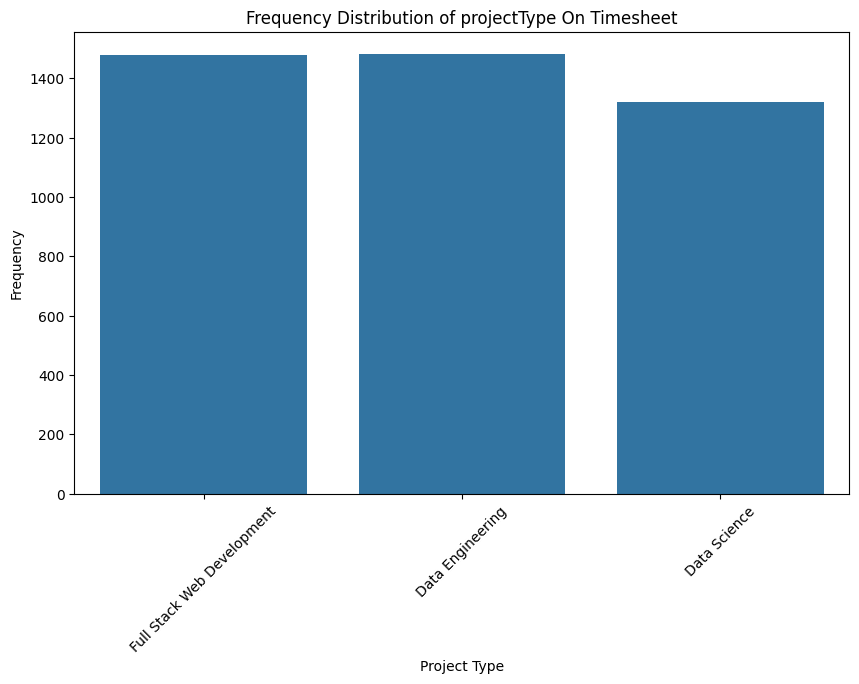

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='projectType_x')
plt.title('Frequency Distribution of projectType On Timesheet')
plt.xlabel('Project Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

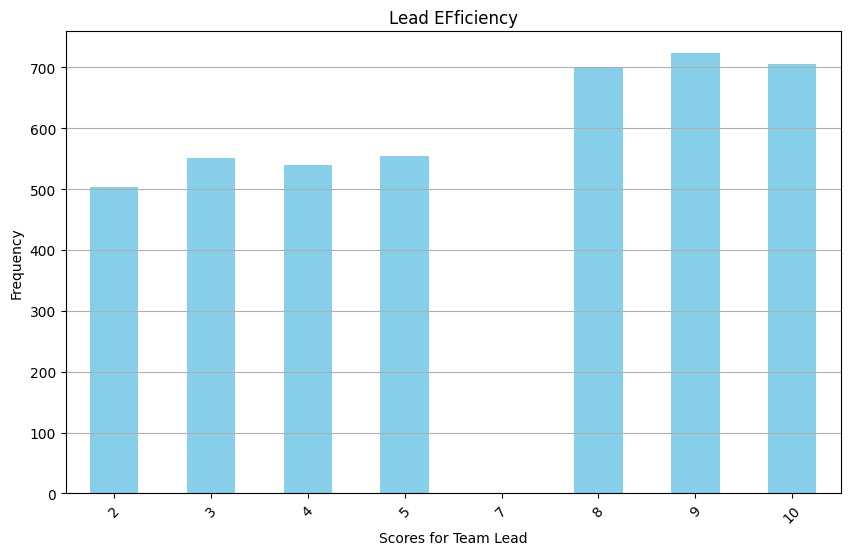

In [59]:
q7_counts = df['Q7'].value_counts()

# Sort the counts by the index (the unique values of 'Q7')
q7_counts = q7_counts.sort_index()

# Plot the bar plot
plt.figure(figsize=(10, 6))
q7_counts.plot(kind='bar', color='skyblue')
plt.title('Lead EFficiency')
plt.xlabel('Scores for Team Lead')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Bivariate Analysis

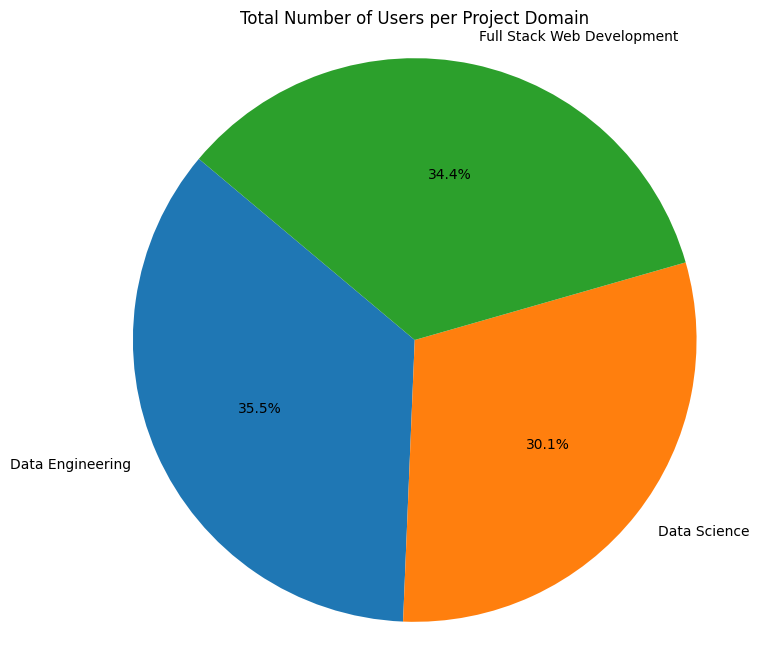

In [17]:
import matplotlib.pyplot as plt

# Group by projectDomain and count unique users
users_per_domain = data.groupby('projectType_x')['userId_x'].nunique()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(users_per_domain, labels=users_per_domain.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Number of Users per Project Domain')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


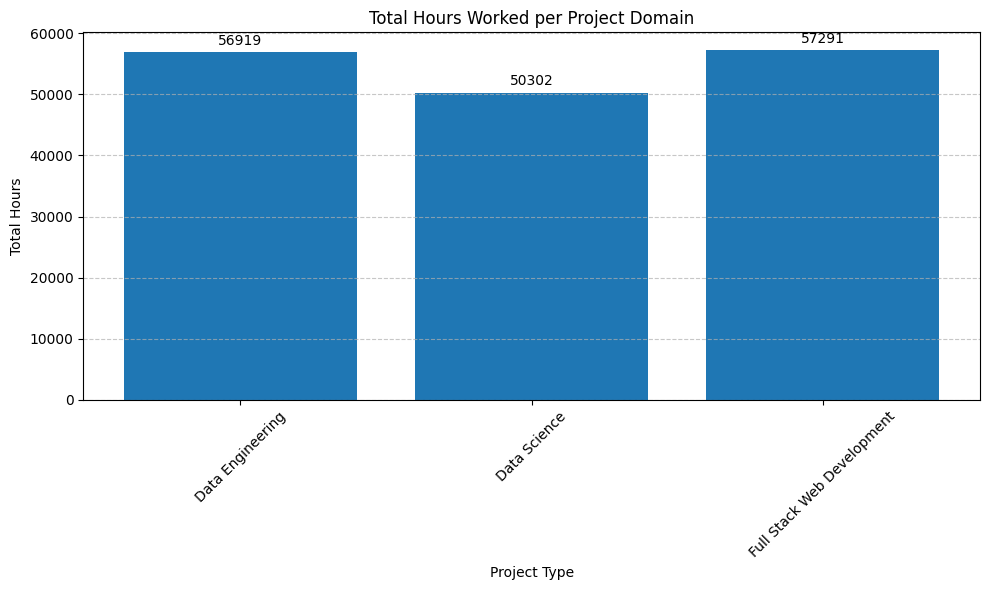

In [18]:
import matplotlib.pyplot as plt

# Group by projectType and sum totalHours
hours_per_project_type = data.groupby('projectType_x')['totalHours'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(hours_per_project_type.index, hours_per_project_type)
plt.title('Total Hours Worked per Project Domain')
plt.xlabel('Project Type')
plt.ylabel('Total Hours')
plt.xticks(rotation=45)

# Add total hours as labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


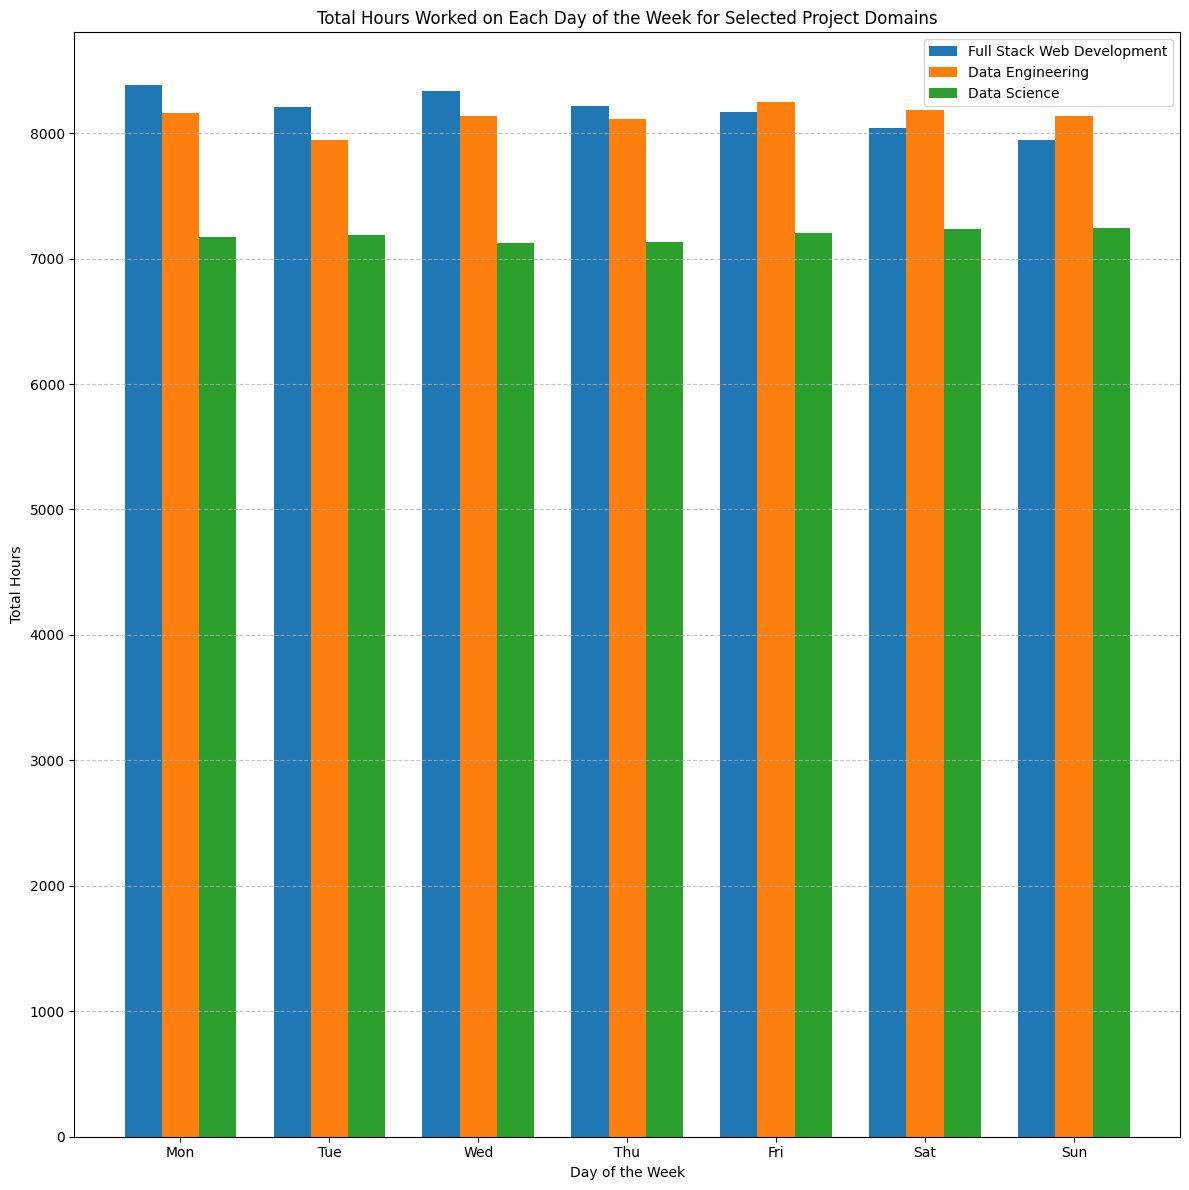

In [19]:
import matplotlib.pyplot as plt

# Select three specific project domains
domain1 = 'Full Stack Web Development'
domain2 = 'Data Engineering'
domain3 = 'Data Science'

# Filter the data for the selected domains
filtered_data_domain1 = data[data['projectType_x'] == domain1]
filtered_data_domain2 = data[data['projectType_x'] == domain2]
filtered_data_domain3 = data[data['projectType_x'] == domain3]

# Group by day of the week and sum total hours for each domain
hours_domain1 = filtered_data_domain1[['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']].sum()
hours_domain2 = filtered_data_domain2[['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']].sum()
hours_domain3 = filtered_data_domain3[['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']].sum()

# Create a triple bar chart
plt.figure(figsize=(12, 12))
bar_width = 0.25
index = range(len(hours_domain1))
plt.bar(index, hours_domain1, bar_width, label=domain1)
plt.bar([i + bar_width for i in index], hours_domain2, bar_width, label=domain2)
plt.bar([i + 2 * bar_width for i in index], hours_domain3, bar_width, label=domain3)

# Customize the chart
plt.title('Total Hours Worked on Each Day of the Week for Selected Project Domains')
plt.xlabel('Day of the Week')
plt.ylabel('Total Hours')
plt.xticks([i + bar_width for i in index], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


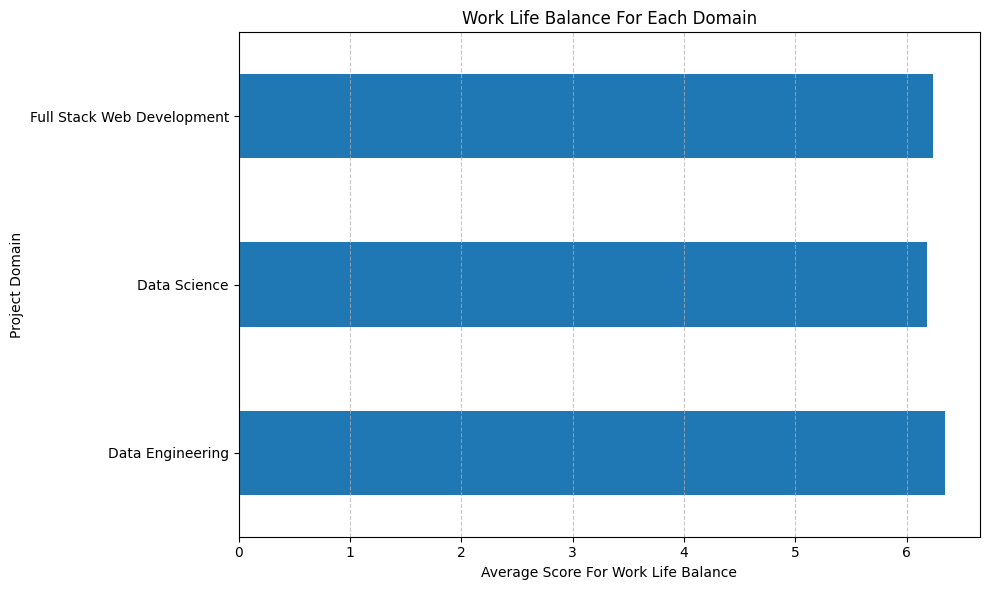

In [20]:
import matplotlib.pyplot as plt

# Filter the data for question Q7
q7_data = data[['projectType_x', 'Q7']]

# Group by projectDomain and calculate the average score for Q7
average_score_per_domain = q7_data.groupby('projectType_x')['Q7'].mean()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
average_score_per_domain.plot(kind='barh')
plt.title('Work Life Balance For Each Domain')
plt.xlabel('Average Score For Work Life Balance')
plt.ylabel('Project Domain')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [21]:
!pip install ydata-profiling


In [22]:
report = ProfileReport(data)


In [23]:
report.to_file('sample.html')

Summarize dataset:  89%|███████████████████████████████▎   | 42/47 [00:00<00:00, 69.70it/s, Calculate auto correlation]C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'FULL01'')
  warnings.warn(
Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.46it/s]


# Feature Engineering

In [24]:
print(data.columns)


Index(['_id_x', 'userId_x', 'projectType_x', 'projectId_x', 'projectName_x',
       'task', 'comment', 'totalHours', 'timesheetId', 'feedbackId',
       'weekStartDate', 'weekEndDate', '__v_x', 'mon', 'tue', 'wed', 'thu',
       'fri', 'sat', 'sun', '_id_y', 'userId_y', 'projectId_y',
       'projectName_y', 'projectType_y', 'additionalComments', '__v_y', 'Q1',
       'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12',
       'comments'],
      dtype='object')


In [25]:
# Find the index of the column '__v_x'
split_index = data.columns.get_loc('_id_y')

# Split the dataset at the column '__v_x'
Timesheet = data.iloc[:, :split_index]
Feedback = data.iloc[:, split_index:]

# Display the first subset
print("First Subset:")
print(Timesheet.head())

# Display the second subset
print("\nSecond Subset:")
print(Feedback.head())


First Subset:
                      _id_x  userId_x               projectType_x projectId_x  \
0  66166cc7d31405dcf870afd3         1  Full Stack Web Development      FULL01   
1  66166cc7d31405dcf870afd7         1            Data Engineering      DATA01   
2  6618e3f4e7506de234ed1b8c        83  Full Stack Web Development      FULL01   
3  6618e3f4e7506de234ed1b8d        83  Full Stack Web Development      FULL01   
4  6618e3f4e7506de234ed1b8e        83  Full Stack Web Development      FULL01   

                                       projectName_x  \
0                      Railway Ticket Booking System   
1  DataNexus: Bridging Data Gaps for Holistic Bus...   
2                      Railway Ticket Booking System   
3                      Railway Ticket Booking System   
4                      Railway Ticket Booking System   

                                                task  \
0   Write unit tests for backend APIs, ensure cod...   
1                      Define Data Lake Requiremen

In [26]:
print(Timesheet.columns)

Index(['_id_x', 'userId_x', 'projectType_x', 'projectId_x', 'projectName_x',
       'task', 'comment', 'totalHours', 'timesheetId', 'feedbackId',
       'weekStartDate', 'weekEndDate', '__v_x', 'mon', 'tue', 'wed', 'thu',
       'fri', 'sat', 'sun'],
      dtype='object')


In [27]:
# Mapping dictionary
project_type_mapping = {
    'Full Stack Web Development': 0,
    'Data Engineering': 1,
    'Data Science': 2
}

# Replace projectType_x with the mapped values
data['projectType_x'] = data['projectType_x'].replace(project_type_mapping)

# Display the updated DataFrame
print(data.head())


                      _id_x  userId_x  projectType_x projectId_x  \
0  66166cc7d31405dcf870afd3         1              0      FULL01   
1  66166cc7d31405dcf870afd7         1              1      DATA01   
2  6618e3f4e7506de234ed1b8c        83              0      FULL01   
3  6618e3f4e7506de234ed1b8d        83              0      FULL01   
4  6618e3f4e7506de234ed1b8e        83              0      FULL01   

                                       projectName_x  \
0                      Railway Ticket Booking System   
1  DataNexus: Bridging Data Gaps for Holistic Bus...   
2                      Railway Ticket Booking System   
3                      Railway Ticket Booking System   
4                      Railway Ticket Booking System   

                                                task  \
0   Write unit tests for backend APIs, ensure cod...   
1                      Define Data Lake Requirements   
2  Design the database schema, define tables, and...   
3  Design the database schema,

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21700\3160745415.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['projectType_x'] = data['projectType_x'].replace(project_type_mapping)


In [28]:
data = data[['userId_x', 'projectType_x', 'totalHours', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']]

# Model

In [29]:
# Define a threshold for total hours
threshold_hours = 60

# Create a binary target variable indicating if a user needs regularization or not
data['needs_regularization'] = (data['totalHours'] > threshold_hours).astype(int)

# Define features and target variable
X = data[['userId_x', 'projectType_x', 'totalHours', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']]
y = data['needs_regularization']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)
results = X_test.copy()
results['needs_regularization_actual'] = y_test
results['needs_regularization_predicted'] = y_pred

# Convert to CSV
results.to_csv('results_with_predictions.csv', index=False)

# Display the first few rows of the CSV file
print(results.head())
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


      userId_x  projectType_x  totalHours  mon  tue  wed  thu  fri  sat  sun  \
1188        55              1          34    7    5    4    8    5    3    2   
2299       280              0          48    9    5    9    7    4    6    8   
4139       492              1          42    7    4    8    3    4    8    8   
3989       281              2          34    2    1    2    6    9    8    6   
3879       393              1          24    6    7    3    3    3    1    1   

      needs_regularization_actual  needs_regularization_predicted  
1188                            0                               0  
2299                            0                               0  
4139                            0                               0  
3989                            0                               0  
3879                            0                               0  
Accuracy: 0.9988317757009346
Confusion Matrix:
[[855   0]
 [  1   0]]
Precision: 0.0
Recall: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21700\229761968.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['needs_regularization'] = (data['totalHours'] > threshold_hours).astype(int)
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Define a threshold for total hours
threshold_hours = 60

# Create a binary target variable indicating if a user needs regularization or not
data['needs_regularization'] = (data['totalHours'] > threshold_hours).astype(int)

# Define features and target variable
X = data[['userId_x', 'projectType_x', 'totalHours', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']]
y = data['needs_regularization']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier()

# Train the XGBoost Classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_classifier.predict(X_test)
results = X_test.copy()
results['needs_regularization_actual'] = y_test
results['needs_regularization_predicted'] = y_pred

# Convert to CSV
results.to_csv('xgb_results_with_predictions.csv', index=False)

# Display the first few rows of the CSV file
print(results.head())
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


      userId_x  projectType_x  totalHours  mon  tue  wed  thu  fri  sat  sun  \
1188        55              1          34    7    5    4    8    5    3    2   
2299       280              0          48    9    5    9    7    4    6    8   
4139       492              1          42    7    4    8    3    4    8    8   
3989       281              2          34    2    1    2    6    9    8    6   
3879       393              1          24    6    7    3    3    3    1    1   

      needs_regularization_actual  needs_regularization_predicted  
1188                            0                               0  
2299                            0                               0  
4139                            0                               0  
3989                            0                               0  
3879                            0                               0  
Accuracy: 0.9988317757009346
Confusion Matrix:
[[855   0]
 [  1   0]]
Precision: 0.0
Recall: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21700\4142024363.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['needs_regularization'] = (data['totalHours'] > threshold_hours).astype(int)
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# NLP

In [48]:
df = pd.read_csv('jmantobedropped.csv')
df = df['additionalComments']


# VADER

In [56]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df = pd.read_csv('jmantobedropped.csv')
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get VADER sentiment scores
def vader_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        return 'positive', compound_score
    elif compound_score <= -0.05:
        return 'negative', compound_score
    else:
        return 'neutral', compound_score

# Apply VADER sentiment analysis to each row in the DataFrame
df['vader_sentiment'], df['vader_compound_score'] = zip(*df['additionalComments'].apply(vader_sentiment))

# Group the DataFrame by 'projectId' and calculate the average sentiment score for each group
project_sentiment_scores = df.groupby('projectId_x')['vader_sentiment'].value_counts(normalize=True).unstack(fill_value=0)

# Display the sentiment scores and compound scores for each projectId
print(project_sentiment_scores)
print(df[['additionalComments', 'vader_sentiment', 'vader_compound_score']])


vader_sentiment  negative   neutral  positive
projectId_x                                  
DASC01           0.392857  0.178571  0.428571
DASC02           0.417582  0.076923  0.505495
DASC03           0.377778  0.088889  0.533333
DASC04           0.384615  0.128205  0.487179
DASC05           0.423077  0.076923  0.500000
DASC06           0.388889  0.111111  0.500000
DASC07           0.404762  0.142857  0.452381
DASC08           0.408333  0.091667  0.500000
DASC11           0.444444  0.138889  0.416667
DASC12           0.425000  0.116667  0.458333
DASC13           0.464912  0.096491  0.438596
DASC14           0.395833  0.145833  0.458333
DASC15           0.354167  0.156250  0.489583
DASC16           0.385417  0.083333  0.531250
DASC17           0.452381  0.130952  0.416667
DATA01           0.368421  0.175439  0.456140
DATA02           0.361905  0.161905  0.476190
DATA03           0.416667  0.091667  0.491667
DATA04           0.386364  0.136364  0.477273
DATA05           0.369048  0.10714

In [47]:
print(df['additionalComments'])


0                                                 Super\n
1       Despite differences in opinions, the team main...
2       Our team had a good balance of creativity and ...
3       We had some overlapping responsibilities withi...
4       We could have allocated resources more effecti...
                              ...                        
4274    Our team meetings were productive, but there w...
4275    There was a lack of recognition for individual...
4276    The team had a tendency to avoid conflict, res...
4277    We encountered significant turnover within the...
4278    Certain team members were resistant to collabo...
Name: additionalComments, Length: 4279, dtype: object


In [36]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm import tqdm

In [37]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ASUS\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment-latest. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the model checkpoint at cardiffnlp/twitter-robe

In [38]:
example = df['additionalComments'][40]
print(example)

We encountered significant power struggles within the team, with individuals vying for control.


In [39]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores = np.array(scores)
    sentiment_class = ['negative', 'neutral', 'positive'][np.argmax(scores)]
    return scores,sentiment_class

In [40]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['additionalComments']
        scores, sentiment = polarity_scores_roberta(text)
        res[i] = {'**roberta_result': {'scores': scores, 'sentiment': sentiment}}
    except RuntimeError:
        print(f'Broke for row {i}')

100%|██████████████████████████████████████████████████████████████████████████████| 4279/4279 [03:45<00:00, 18.95it/s]


In [41]:
df['sentiment'] = [res[i]['**roberta_result']['sentiment'] for i in range(len(df))]

In [42]:
df.head()

,_id_x,userId_x,projectType_x,projectId_x,projectName_x,task,comment,totalHours,timesheetId,feedbackId,...,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,sentiment
0,66166cc7d31405dcf870afd3,1,Full Stack Web Development,FULL01,Railway Ticket Booking System,"Write unit tests for backend APIs, ensure cod...",good,40,TS01,F01,...,8,7,6,7,2,8,8,8,8,positive
1,66166cc7d31405dcf870afd7,1,Data Engineering,DATA01,DataNexus: Bridging Data Gaps for Holistic Bus...,Define Data Lake Requirements,awesome,47,TS02,F02,...,8,7,9,8,6,6,6,4,1,positive
2,6618e3f4e7506de234ed1b8c,83,Full Stack Web Development,FULL01,Railway Ticket Booking System,"Design the database schema, define tables, and...",patch management: applied security patches.,49,TS03,F03,...,9,2,7,10,4,1,1,7,9,positive
3,6618e3f4e7506de234ed1b8d,83,Full Stack Web Development,FULL01,Railway Ticket Booking System,"Design the database schema, define tables, and...",accessibility audit: fixed wcag compliance iss...,42,TS04,F04,...,7,1,4,8,3,1,3,7,5,neutral
4,6618e3f4e7506de234ed1b8e,83,Full Stack Web Development,FULL01,Railway Ticket Booking System,"Design the database schema, define tables, and...",sprint retrospective: identified areas for imp...,43,TS05,F05,...,6,7,5,8,9,10,8,6,6,neutral


In [43]:
# Save the DataFrame to a CSV file
df.to_csv('sentiment_analysis_output.csv', index=False)

In [44]:
 # Group the DataFrame by 'projectId' and calculate the average sentiment score for each group
project_sentiment_scores = df.groupby('projectId_x')['sentiment'].value_counts(normalize=True).unstack(fill_value=0)

# Display the sentiment scores for each projectId
print(project_sentiment_scores)


sentiment    negative   neutral  positive
projectId_x                              
DASC01       0.642857  0.178571  0.178571
DASC02       0.593407  0.208791  0.197802
DASC03       0.566667  0.144444  0.288889
DASC04       0.628205  0.115385  0.256410
DASC05       0.589744  0.217949  0.192308
DASC06       0.500000  0.208333  0.291667
DASC07       0.690476  0.190476  0.119048
DASC08       0.583333  0.183333  0.233333
DASC11       0.555556  0.194444  0.250000
DASC12       0.566667  0.166667  0.266667
DASC13       0.596491  0.166667  0.236842
DASC14       0.625000  0.145833  0.229167
DASC15       0.614583  0.145833  0.239583
DASC16       0.583333  0.135417  0.281250
DASC17       0.642857  0.154762  0.202381
DATA01       0.631579  0.157895  0.210526
DATA02       0.609524  0.171429  0.219048
DATA03       0.700000  0.125000  0.175000
DATA04       0.568182  0.174242  0.257576
DATA05       0.619048  0.166667  0.214286
DATA06       0.533333  0.211111  0.255556
DATA07       0.620370  0.185185  0